In [1]:
import numpy as np
import numpy.random as rd
import matplotlib as mpl
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import Axes3D
import scipy.special as spec
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (5,5)
mp.rcParams["figure.dpi"] = 100

In [3]:
def factorial(n):
    return spec.gamma(n+1)

def Rnm(n, m, r):
    if n == 0 and m == 0:
        return np.ones_like(r)
    if (n - m == 0) or ((n-m)%2 == 0):
        if n - m == 0:
            m *= -1
        suma = 0
        for k in range((n-m)//2):
            num = (-1)**k * factorial(n-k) * r**((n - 2*k))
            den = factorial(k) * factorial(1/2*(n+m) - k) * factorial(1/2*(n-m) - k)
            suma += num/den
        return suma

def Znm(n, m, r, phi):
    R = Rnm(n, m, r)
    if m > 0:
        return R*np.sin(m*phi)
    elif m < 0:
        return R*np.cos(m*phi)
    else:
        return R

def ZernikeGen(n, m, res=500):
    r = np.linspace(1e-12, 1, res)
    phi = np.linspace(0, 2*np.pi, res)
    R, Phi = np.meshgrid(r, phi)
    X,Y = R*np.cos(Phi), R*np.sin(Phi)
    Z = Znm(n, m, R, Phi)
    return X,Y,Z

def ZernikePlot(n, m, res=500, cm="RdYlGn", save=False, plotname=None, **viewargs):
    X,Y,Z = ZernikeGen(n, m, res)
    fig = mp.figure(figsize=(5*2, 5))
    ax = fig.add_subplot(121, projection="3d")
    ax.view_init(**viewargs)
    ax.plot_surface(X, Y, Z, cmap=cm, rstride=3, cstride=3, lw=1, antialiased=True)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")
    
    ax = fig.add_subplot(122)
    ax.contourf(X, Y, Z, levels=np.linspace(-1,1,res), cmap=cm, antialiased=True)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    
    mp.suptitle("$Z_{%i}^{%i}$"%(n,m), fontsize=14)
    
    if save:
        savename = "Z" + str(n) + str(m) + "_" + str(plotname) + ".png"
        mp.savefig(savename, dpi=300, bbox_inches="tight")
        
    mp.show()

In [241]:
nlist = [0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4]
mlist = [0, -1, 1, -2, 0, 2, -3, -1, 1, 3, -4, -2, 0, 2, 4]
namelist = ["piston", "tiltx", "tilty", "astigmatism45", "defocussing", \
            "astigmatism0", "trefoil30", "comax", "comay", "trefoil0", \
           "foursheet225", "secondaryastigmatism", "sphericalaberration", \
           "secondaryastigmatism", "foursheet0"]

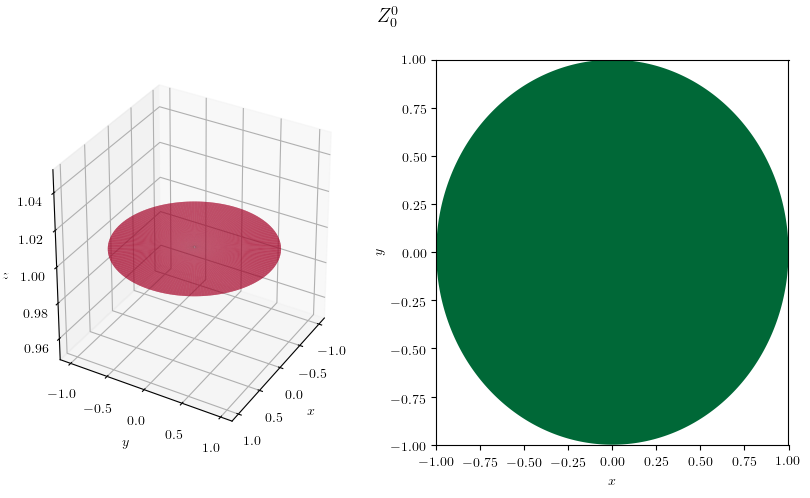

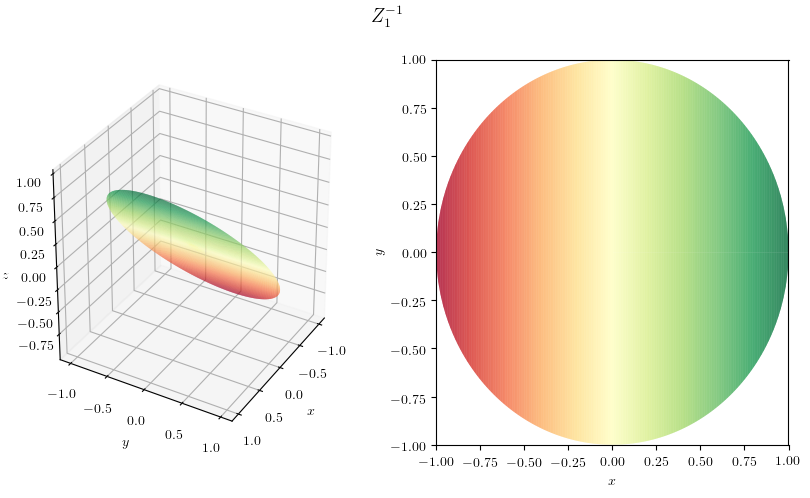

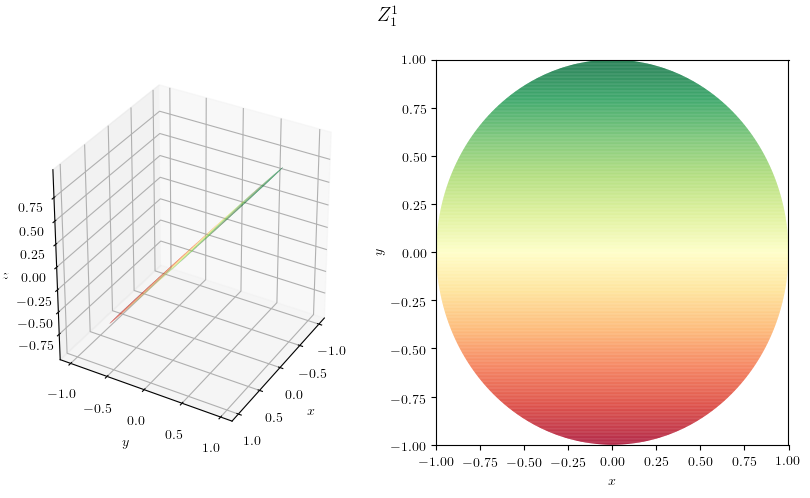

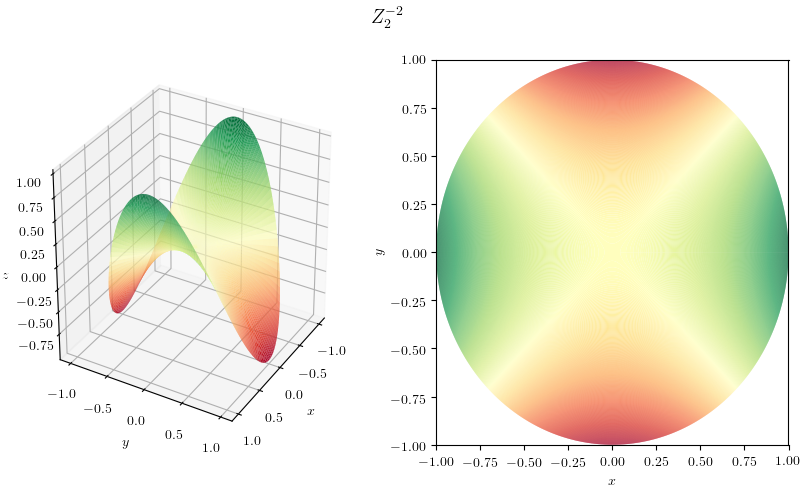

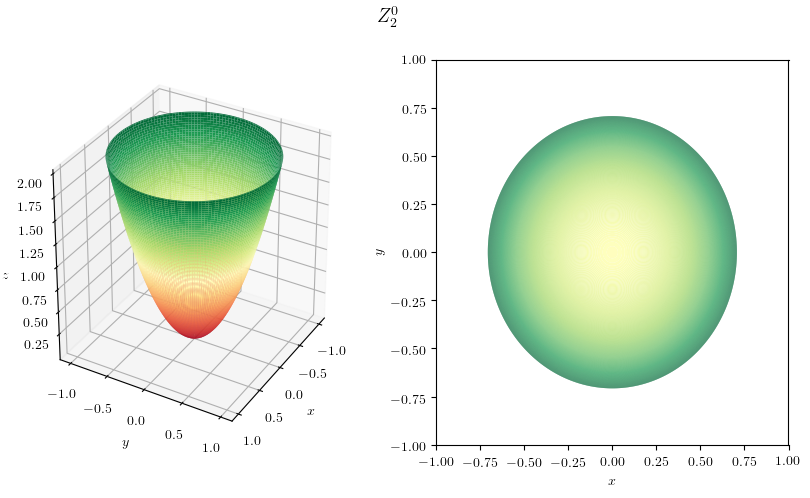

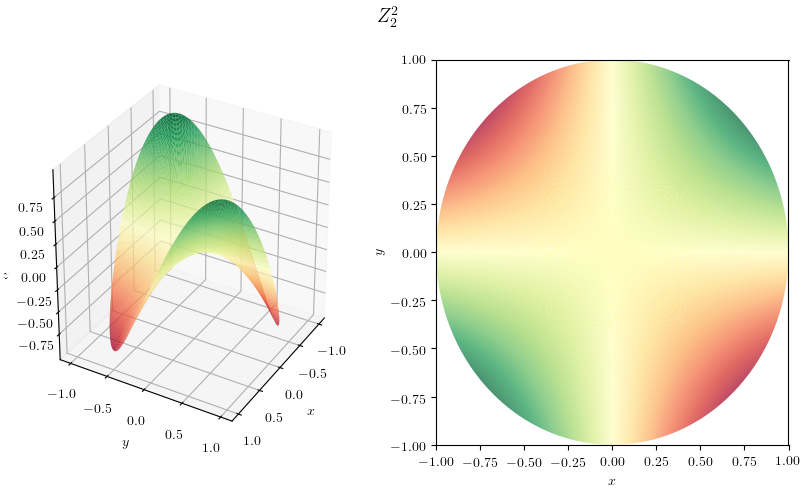

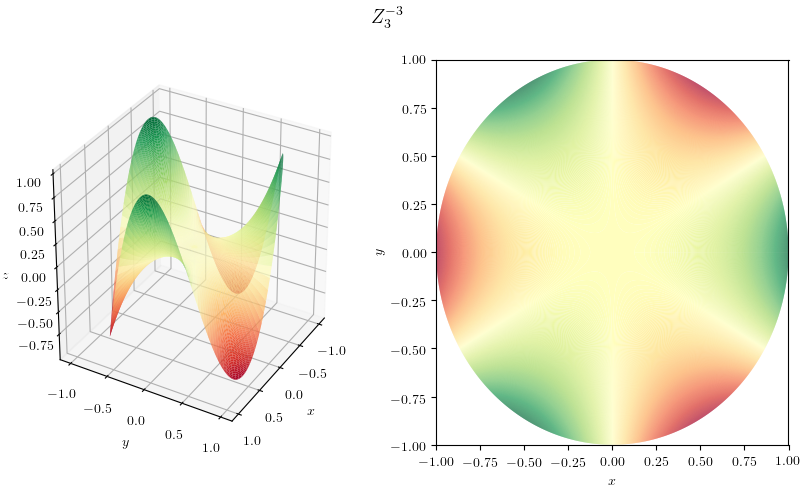

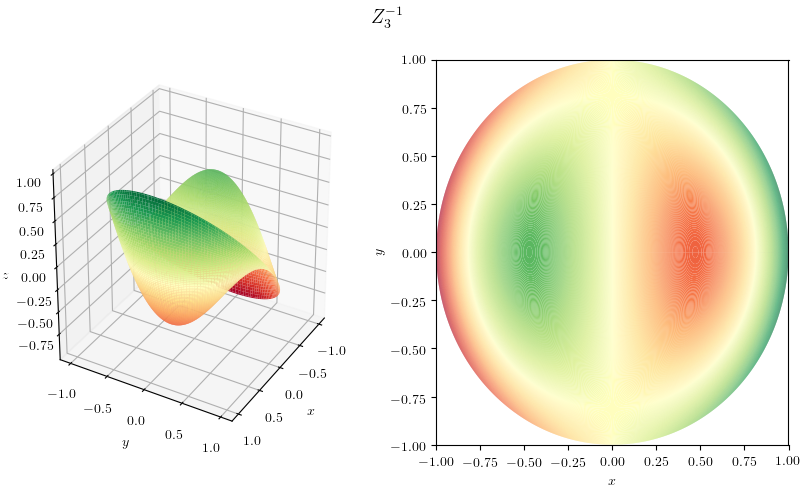

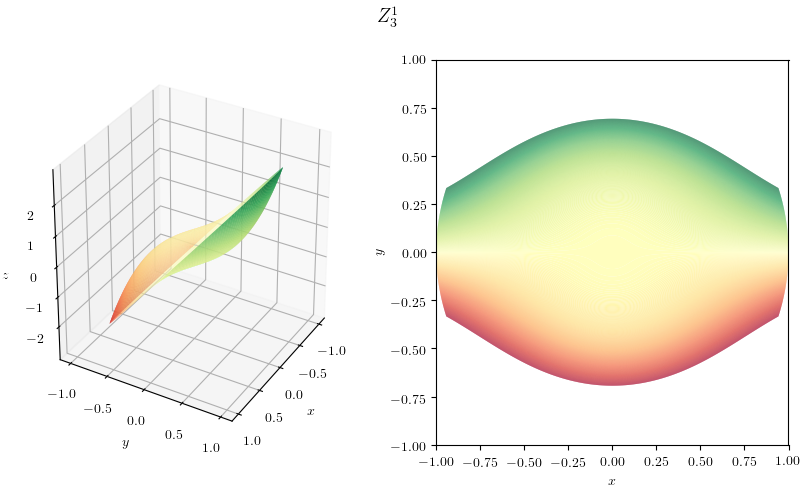

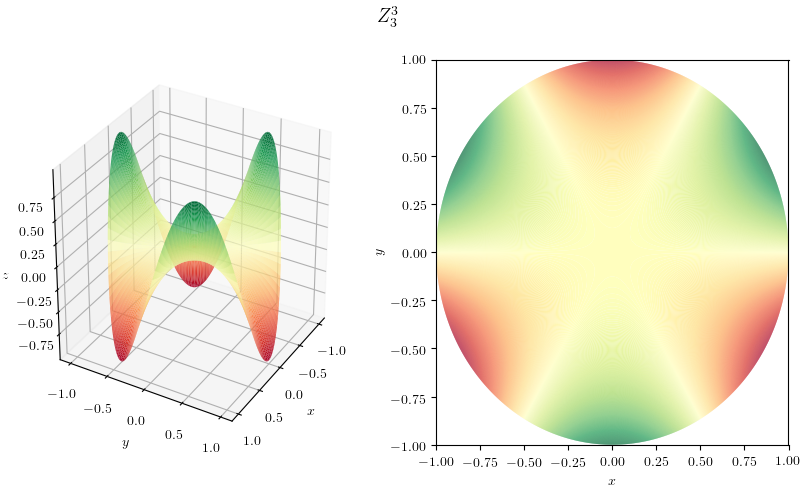

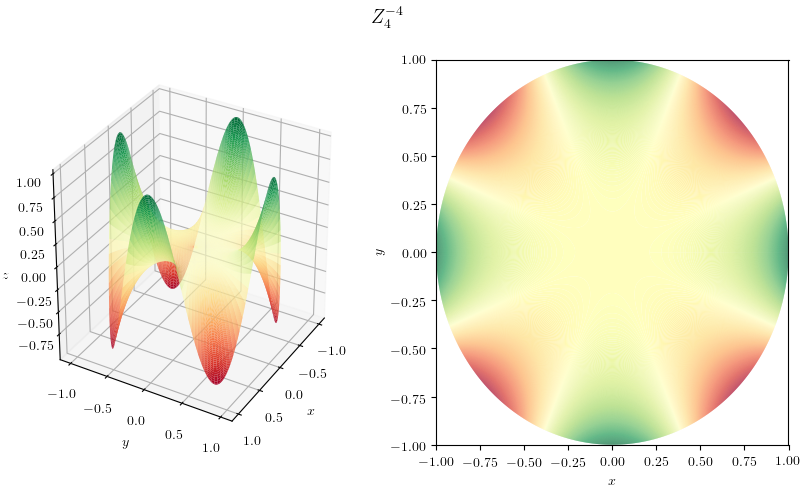

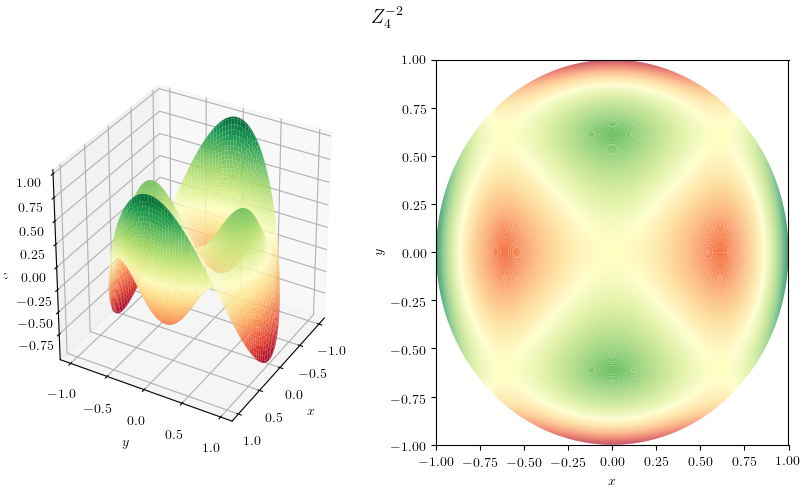

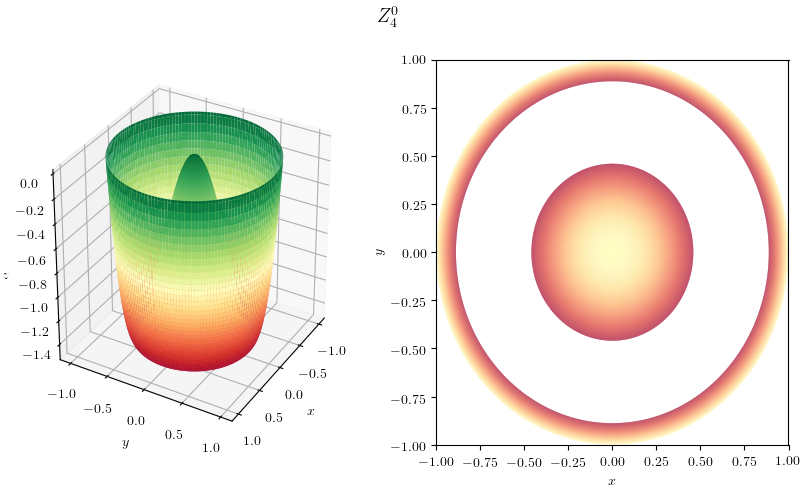

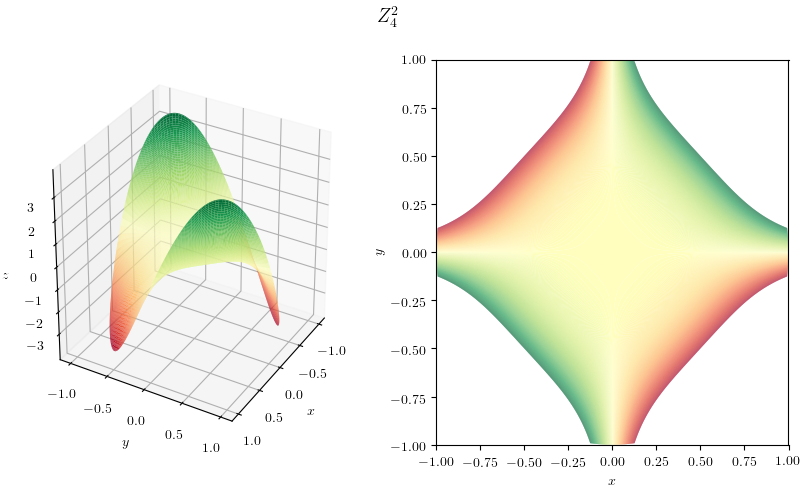

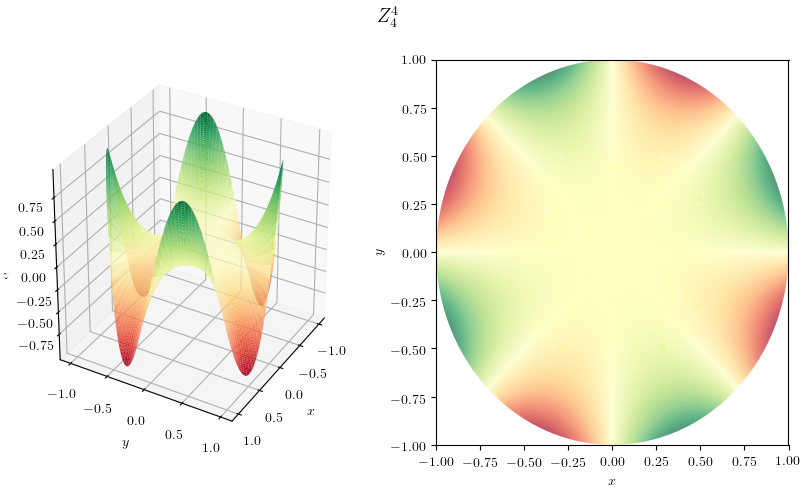

In [242]:
for n,m,l in zip(nlist, mlist, namelist):
    ZernikePlot(n, m, save=True, plotname=l, azim=30, elev=30)

In [26]:
X,Y,Z = ZernikeGen(4, 0)

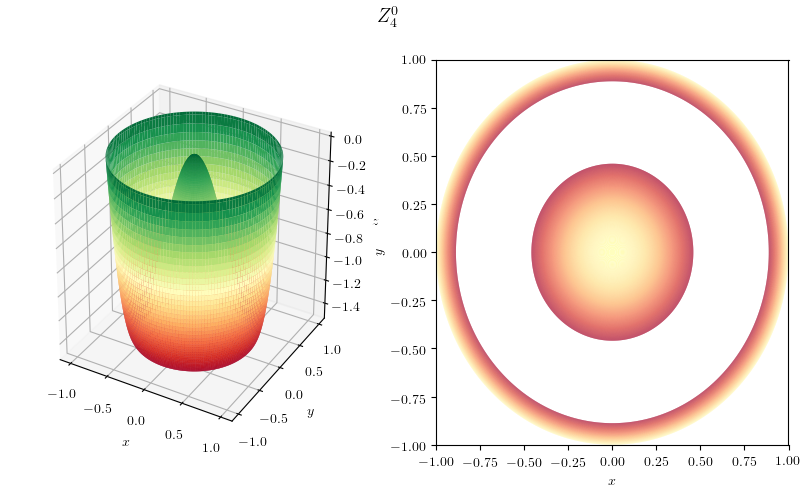

In [4]:
ZernikePlot(4,0)

In [81]:
x = np.arange(-1, 1, 0.01)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
Phi = np.arctan2(Y,X)
Z1 = np.ones_like(R)
Z1[R>1] = 0
Z1 /= np.linalg.norm(Z1, ord=2)

Z2 = R*np.sin(Phi)
Z2[R>1] = 0
Z2 /= np.linalg.norm(Z2, ord=2)

Z3 = R*np.cos(Phi)
Z3[R>1] = 0
Z3 /= np.linalg.norm(Z3, ord=2)

W = 0.2*Z1 + 2.4*Z2 -0.8*Z3

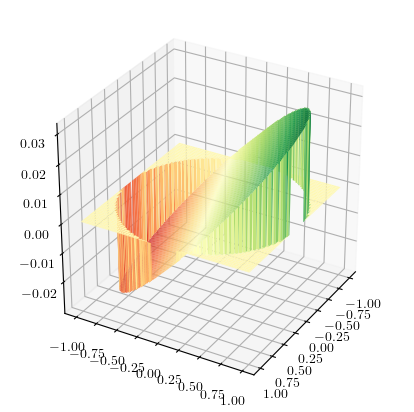

In [76]:
fig = mp.figure()
ax = fig.add_subplot(111, projection="3d")
ax.view_init(azim=30, elev=30)
ax.plot_surface(X,Y,W, cmap="RdYlGn", rstride=3, cstride=3, antialiased=True)
mp.show()

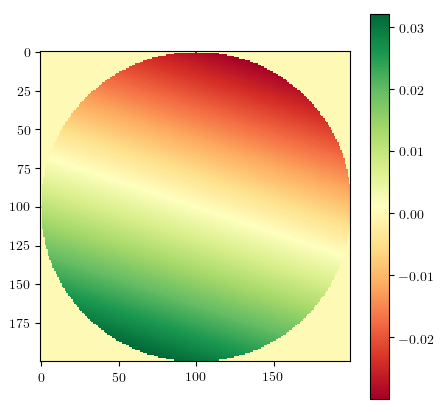

In [77]:
mp.imshow(W, "RdYlGn")
mp.colorbar()
mp.show()

In [80]:
sum(sum(W.dot(Z1)))

37.69024935670915

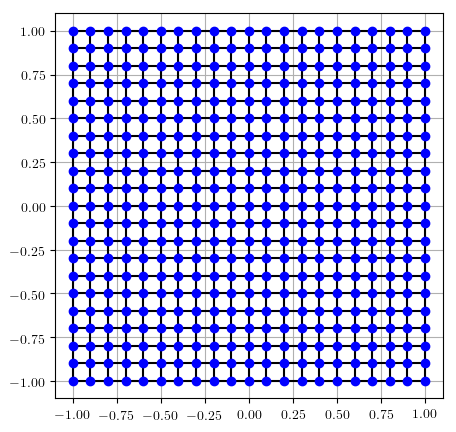

In [208]:
N = 21
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X,Y = np.meshgrid(x,y)

mp.plot(X,Y, "k-")
mp.plot(Y,X, "k-")
mp.plot(X,Y, "bo")
mp.grid()
mp.show()

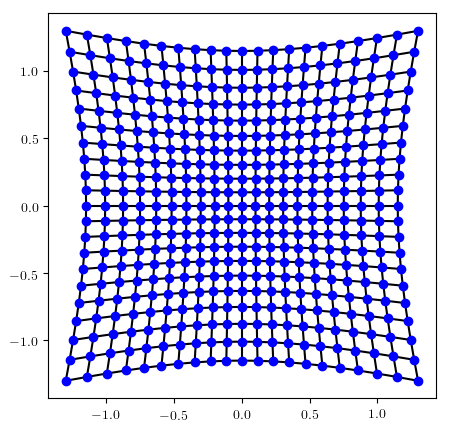

In [209]:
C = 0.3
L = 1
n = 2

cenx, ceny = X[N//2, N//2], Y[N//2, N//2]
for i in range(N):
    for j in range(N):
        R = np.hypot(X[i,j] - cenx, Y[i,j]-ceny)
        phi = np.arctan2(Y[i,j], X[i,j])
        xp, yp = R*np.cos(phi), R*np.sin(phi)
        dx = C*L/n*(xp**3 + xp*yp**2)
        dy = C*L/n*(xp**2*yp + yp**3)
        X[i,j] += dx
        Y[i,j] += dy
        
mp.plot(X,Y, "k-")
mp.plot(Y,X, "k-")
mp.plot(X,Y, "bo")
mp.show()

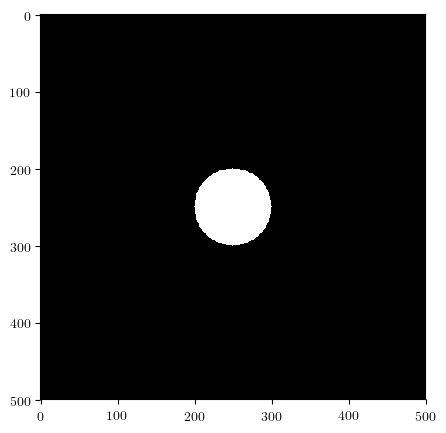

In [250]:
N = 500
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
X,Y = np.meshgrid(x,y)
Z = np.zeros_like(X)
h,k,rad = 150, 125, 50
for i in range(N):
    for j in range(N):
        if np.hypot(i-N//2,j-N//2) <= rad:
            Z[i,j] = 1

mp.imshow(Z, "gray")
mp.show()

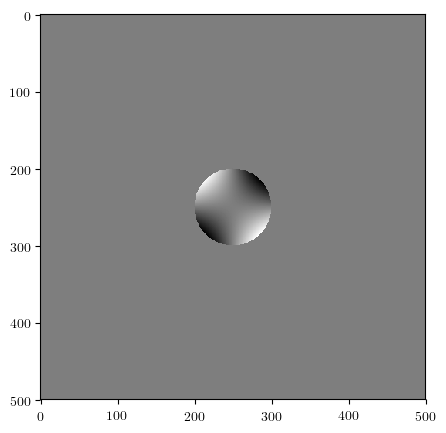

In [260]:
C = 0.5
L = 1
n = 1.5

R = np.sqrt(X**2 + Y**2)
Phi = np.arctan2(Y,X)
Z1 = np.ones_like(X)
Z1 = C*L/n*(2*X*Y)
Z1 /= np.linalg.norm(Z1, ord=2)
Z1[R>1] = 0

Z2 = Z*Z1
mp.imshow(Z2, "gray")
mp.show()